In [193]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

from scipy.optimize import curve_fit 

import minkowski_tools as mt

In [136]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [3]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [4]:
connections = mt.get_connections(points, pval=2, radius=0.05)

In [6]:
# connections = get_connections

def perc_thresh1(connections):
    previous = {}

    for ind in [n-2, n-1]:
        previous[ind] = {ind}

    if connections[n-1, n-2]:
        previous[n-1].add(n-2)

    no_points = 2

    
    while (n-2) not in previous[n-1] and no_points<n:
        
        no_points += 1
        
        upto = n-no_points
        previous[upto] = {upto}

        for node_to_current in np.nonzero(connections[n-no_points, n-no_points:])[0]:
            previous[upto].update(previous[upto + node_to_current])

        nodes_from = set(upto + np.nonzero(connections[upto:, upto])[0])

        for other_node in range(upto, n):
            if previous[other_node].intersection(nodes_from):
                previous[other_node].update(previous[upto])

    return no_points

# if (n-2) in previous[n-1]:
#     return no_points

# else:
#     print('Diagonal not connected.')
#     return False

# no_points = perc_thresh1(connections)
# mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.05)), no_points

In [694]:
# def perc_thresh2(connections):

#this doesnnt work, doesn't update the searrch recursively
#maybe have a beofre and after, see what does

def perc_thresh2(connections):
    before_after = np.identity(len(connections))

    if connections[n-1, n-2]:
        before_after[n-1, n-2] = 1

    no_points = 2
    use = connections.astype(bool).astype(int)

    while (before_after[n-2, n-1]==0) and no_points<n:

        no_points += 1
        upto = n-no_points

        for v in np.nonzero(connections[upto:, upto])[0]:
            before_after[upto, :] += before_after[v+upto, :]

        for v in np.nonzero(connections[upto, upto:])[0]:
            before_after[v+upto, :] += before_after[upto, :]

    return no_points

no_points = perc_thresh2(connections)
mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.05)), no_points

(([3999, 3375, 3195, 2394, 3998], 1.414217714358471), 4000)

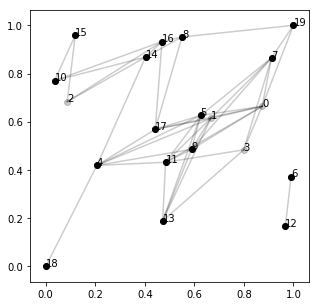

In [632]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(*points[:, n-no_points:], c='k')
plt.scatter(*points, c='k', alpha=.2)

perc_path1 = np.array([points[:, i+n-no_points] for i in mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=1))[0]]).transpose()
perc_path2 = np.array([points[:, i+n-no_points] for i in mt.longest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.2))[0]]).transpose()

# print(perc_path1)

# mt.plot_path_points(ax, points, [perc_path1, perc_path2], ['Shortest', 'Longest'])
# mt.plot_path_points(ax, points, [perc_path1], ['Shortest'])

# plt.scatter(*points[:, n-no_points], c='k')
annotations = [plt.annotate(i, (points[0, i], points[1, i])) for i in range(n)]


for i in range(n):
    for j in range(n):
        if connections[i, j]:
            plt.plot([points[0, i], points[0, j]], [points[1, i], points[1, j]], 'k', alpha=0.2)
# xs = np.arange(0, .5, .001)
# plt.fill_between(xs, np.sqrt(.5*.5-xs*xs))

In [675]:
%timeit perc_thresh1(connections)

966 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [676]:
%timeit perc_thresh2(connections)

388 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [693]:
perc_thresh1(connections), perc_thresh2(connections)

(1876, 4000)

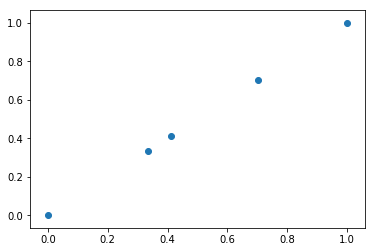

In [691]:
plt.scatter(*points[:, 4000-1876+np.array([1875, 1251, 1071, 270, 1874])])

In [718]:
before_after = np.identity(len(connections))

if connections[n-1, n-2]:
    before_after[n-1, n-2] = 1

no_points = 2
use = connections.astype(bool).astype(int)

while (before_after[n-1, n-2]==0) and no_points<n:

    no_points += 1
    upto = n-no_points

    for v in np.nonzero(connections[upto, upto:])[0]: #to the current node
        before_after[upto, :] += before_after[v+upto, :]

    for v in np.nonzero(connections[upto:, upto])[0]: #from the current node
        before_after[v+upto, :] += before_after[upto, :]

In [719]:
no_points

4000

In [697]:
before_after[-5:, -5:].astype(bool).astype(int)

array([[1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [704]:
np.sum(connections, axis=0)

array([0.04616648, 0.30691713, 0.2969935 , ..., 0.2071728 , 0.27204753,
       0.        ])

In [701]:
np.sum(connections[-3:, :], axis=1)

array([0.22045223, 0.        , 0.20976212])

In [708]:
print(np.sum(connections[:, -1]))
connections[:, -1], connections[-2, :]

0.0


(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [714]:
a = np.arange(4).reshape((2, 2))
a[1, 0]

2

In [715]:
a

array([[0, 1],
       [2, 3]])

In [733]:
quick_data = []

for i in range(10000):
    n=1000
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)
    connections = mt.get_connections(points, pval=2, radius=0.1)
    no_points = perc_thresh1(connections)
    quick_data.append(no_points)

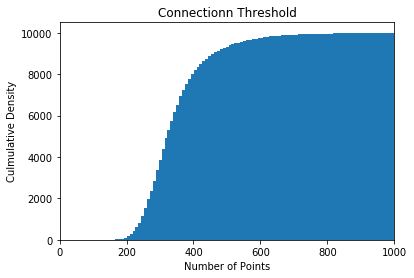

In [737]:
plt.hist(quick_data, cumulative=True, bins=100)
plt.gca().set(xlim=(0, 1000), xlabel='Number of Points', ylabel='Culmulative Density', title='Connectionn Threshold')
# plt.savefig('img/pval2r05.pdf')

(array([  1.,   1.,   3.,   7.,  11.,  10.,  21.,  46.,  81.,  99., 166.,
        187., 201., 325., 394., 406., 414., 474., 509., 476., 538., 522.,
        399., 429., 441., 371., 388., 317., 294., 232., 222., 208., 141.,
        165., 148., 107., 118.,  82., 109.,  73.,  83.,  51.,  64.,  68.,
         60.,  35.,  29.,  49.,  21.,  36.,  36.,  22.,  27.,  26.,  18.,
         23.,  22.,  17.,  10.,  17.,   8.,   8.,  12.,   6.,   9.,   6.,
         13.,   3.,   9.,   6.,   3.,   4.,   2.,   3.,   8.,   3.,   4.,
          3.,   1.,   5.,   3.,   2.,   1.,   2.,   2.,   1.,   0.,   2.,
          2.,   1.,   0.,   1.,   2.,   1.,   2.,   1.,   1.,   0.,   1.,
          9.]),
 array([ 131.  ,  139.69,  148.38,  157.07,  165.76,  174.45,  183.14,
         191.83,  200.52,  209.21,  217.9 ,  226.59,  235.28,  243.97,
         252.66,  261.35,  270.04,  278.73,  287.42,  296.11,  304.8 ,
         313.49,  322.18,  330.87,  339.56,  348.25,  356.94,  365.63,
         374.32,  383.01,  391.7 ,

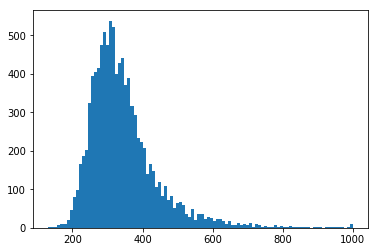

In [739]:
plt.hist(quick_data, bins=100)

In [7]:
%timeit perc_thresh1(connections)

171 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
perc_thresh1(connections)

1215

In [122]:
n=1000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

smallest_r(points, pval=2)

([999,
  305,
  586,
  357,
  382,
  98,
  805,
  12,
  230,
  662,
  997,
  240,
  564,
  958,
  13,
  644,
  79,
  821,
  214,
  511,
  964,
  939,
  270,
  784,
  421,
  475,
  611,
  912,
  265,
  178,
  39,
  942,
  751,
  807,
  4,
  813,
  162,
  733,
  998],
 0.056925707182883714)

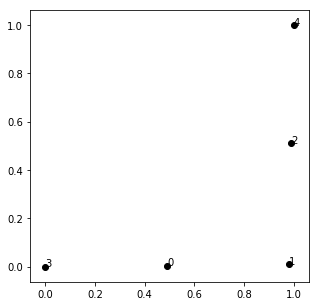

In [119]:
# n=4000
# rand_points = np.random.uniform(size=(2, n-2))
# edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
# points = np.concatenate((rand_points, edge_points), axis=1)

test_points = np.array([[0.49, .98, .99, 0.0, 1.0],[0.005, 0.01, 0.51, 0.0, 1.0]])

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(*test_points, c='k')

# print(perc_path1)

# mt.plot_path_points(ax, points, [perc_path1, perc_path2], ['Shortest', 'Longest'])
# mt.plot_path_points(ax, points, [perc_path1], ['Shortest'])

# plt.scatter(*points[:, n-no_points], c='k')
annotations = [plt.annotate(i, (test_points[0, i], test_points[1, i])) for i in range(test_points.shape[1])]


# for i in range(n):
#     for j in range(n):
#         if connections[i, j]:
#             plt.plot([test_points[0, i], test_points[0, j]], [test_points[1, i], test_points[1, j]], 'k', alpha=0.2)
# xs = np.arange(0, .5, .001)
# plt.fill_between(xs, np.sqrt(.5*.5-xs*xs))

In [42]:
no

(2, 5)

In [113]:
nolimit_connections = np.array([[0.,0.,0.,0.,0.,],
 [0.,0.,0.,0.,0.,],
 [0.,0.,0.,0.,0.,],
 [1.11803399,0.70710678,0.,0.,0.],
 [1.41421356,1.11803399,0.,0.,0.]])

In [97]:
nolimit_connections[4, 0]

1.41421356

In [109]:
0.345 < np.inf

True

In [4]:
n=1000
trials = 100
all_results = {}
results = []
for i in range(trials):
    
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)

    results.append(smallest_r(points, pval=2)[1])
    

NameError: name 'smallest_r' is not defined

In [126]:
results

[0.06291648053509508,
 0.05367561352218865,
 0.04920456146602388,
 0.06119039369314227,
 0.056488336733767956,
 0.05018810682919545,
 0.058127464303187715,
 0.0560633643174598,
 0.057618589072505354,
 0.05182884012922266,
 0.0616141871061359,
 0.05996004169613664,
 0.07052414690109254,
 0.06183558422346722,
 0.07097004728253282,
 0.07156160578395222,
 0.06016094741595061,
 0.05820019649652294,
 0.052327374727652164,
 0.05198764667371146,
 0.05660502376478604,
 0.05818589638984753,
 0.06064444598151545,
 0.06318969094672482,
 0.07246915382109442,
 0.05086225726200443,
 0.0661250468782917,
 0.05578891222486572,
 0.05730981666271527,
 0.05434808720643943,
 0.05418543158898637,
 0.07888642575583857,
 0.06066322172742691,
 0.057053424589257246,
 0.05850613224629501,
 0.0727696880641717,
 0.06322260109233378,
 0.08313847322279842,
 0.059267924673824156,
 0.058332986048504724,
 0.0544073238430542,
 0.06732410690833551,
 0.07214852367222224,
 0.060544365518730554,
 0.068085140201763,
 0.057497

(array([  2.,   3.,   6.,   6.,  10.,  13.,  16.,  21.,  25.,  27.,  31.,
         37.,  39.,  46.,  54.,  56.,  58.,  64.,  69.,  72.,  74.,  75.,
         79.,  81.,  81.,  82.,  83.,  84.,  84.,  85.,  86.,  86.,  86.,
         86.,  88.,  89.,  90.,  92.,  92.,  92.,  93.,  93.,  93.,  93.,
         94.,  94.,  94.,  95.,  95.,  96.,  96.,  97.,  97.,  97.,  98.,
         98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
         98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
         98.,  98.,  98.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
         99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
        100.]),
 array([0.04920456, 0.04982723, 0.0504499 , 0.05107257, 0.05169524,
        0.05231791, 0.05294058, 0.05356326, 0.05418593, 0.0548086 ,
        0.05543127, 0.05605394, 0.05667661, 0.05729928, 0.05792195,
        0.05854462, 0.05916729, 0.05978996, 0.06041263, 0.0610353 ,
        0.06165797, 0.06228064, 0.06290331, 0.

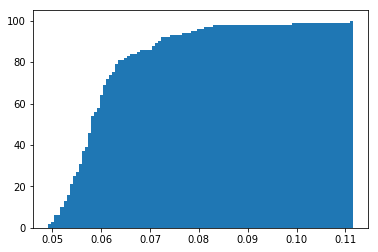

In [128]:
plt.hist(results,cumulative=True, bins=100)

In [134]:
mt.r1_area2D(2)*(.05**2)*n

1.9634950000000009

In [23]:
ns = [1000]
ps = [2]

mt.separate_perc_r(ns, ps, 'outputs/test_perc.txt', repeats=10)

True

In [22]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [18]:
data_dict = {}
for pval in [0.8, 1, 1.2]:
    data_dict[pval] = []
    n = 1000
    r = 0.1
    for i in range(1000):
        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)
        connections = mt.get_connections(points, pval=pval, radius=r)
        no_points = mt.perc_thresh_n(connections)
        data_dict[pval].append(no_points)

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:154: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:155: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


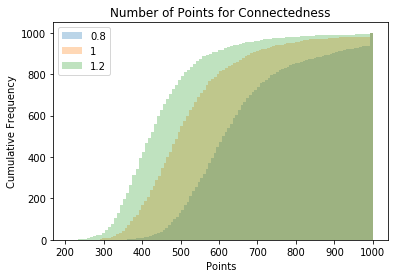

In [152]:
for pval in [0.8, 1, 1.2]:
    plt.hist(data_dict[pval], cumulative=True, bins=100, label=pval, alpha=.3);
    
plt.legend()
plt.gca().set(title='Number of Points for Connectedness', xlabel='Points', ylabel='Cumulative Frequency');
# plt.savefig('img/PointsCumul.pdf')

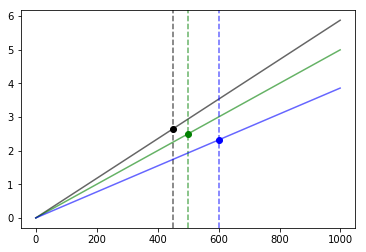

In [147]:
apprx_thresh = [450, 500, 600]
ps = [1.2, 1, 0.8]

for p, thresh, col in zip(ps, apprx_thresh, ['k', 'g', 'b']):
    xs = np.arange(1000)
    ys = xs*(mt.r1_area2D(p)*.1*.1)
    plt.scatter(thresh, thresh*(mt.r1_area2D(p)*.1*.1), c=col)
    plt.plot(xs, ys, c=col, alpha=0.6)
    plt.axvline(x=thresh, c=col, ls='--', label=p, alpha=0.6)

In [129]:
data_dict_r = {}
for pval in [0.8, 1, 1.2]:
    data_dict_r[pval] = []
    n = 1000
    r = 0.1
    for i in range(500):
        print(i, end=',')
        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)
        r_min = smallest_r(points, pval)
        data_dict_r[pval].append(r_min[1])

0,

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

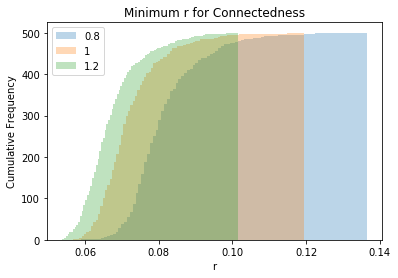

In [154]:
for pval in [0.8, 1, 1.2]:
    plt.hist(data_dict_r[pval], cumulative=True, bins=100, label=pval, alpha=.3);

plt.legend()
plt.gca().set(title='Minimum r for Connectedness', xlabel='r', ylabel='Cumulative Frequency')
# plt.savefig('img/RadCumul.pdf')

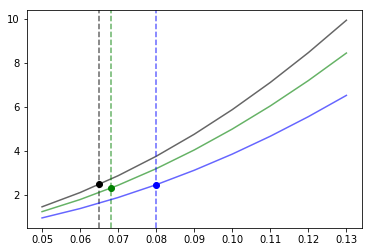

In [150]:
apprx_thresh = [0.065, 0.068, 0.08]
ps = [1.2, 1, 0.8]

for p, thresh, col in zip(ps, apprx_thresh, ['k', 'g', 'b']):
    rs = np.arange(0.05, 0.14, 0.01)
    ys = 1000*(mt.r1_area2D(p)*rs*rs)
    plt.scatter(thresh, 1000*(mt.r1_area2D(p)*thresh*thresh), c=col)
    plt.plot(rs, ys, c=col, alpha=0.6)
    plt.axvline(x=thresh, c=col, ls='--', label=p, alpha=0.6)

In [88]:
n=10
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [97]:
def smallest_r(points,  pval):

    N = points.shape[0]
    n = points.shape[1]

    meshed = [np.meshgrid(points[i, :], points[i, :]) for i in range(N)]

    diffs = np.array([cols-rows for rows, cols in meshed])

    box_cube_condition = (diffs > 0).all(axis=0)

    distsp = (diffs**pval).sum(axis=0)


    nolimit_connections = (distsp**(1/pval))*box_cube_condition.astype(int)
    nolimit_connections = np.nan_to_num(nolimit_connections)

    maxes, prev = {}, {}

    for i in range(n):
        maxes[i] = np.inf
    maxes[n-2] = 0

#     print(mt.topo_sort(nolimit_connections))
    for u in mt.topo_sort(nolimit_connections): #can replace the top sort with points sorting
        for v in np.nonzero(nolimit_connections[:, u])[0]:
            alt = max(maxes[u], nolimit_connections[v, u])
            
            if alt < maxes[v]:
                maxes[v] = alt
                prev[v] = u

    u = n-1

    path=[]
    path.append(u)

    if prev.get(u) is not None:
            while u != n-2:
                u = prev[u]
                path.append(u)

            return path, maxes[n-1]

    else:
            return [], 0.0
        
def topo_sort(connections):
    
    connection_mat = connections.copy()
    n = len(connection_mat)
    Q = list(range(n))
    
    order = []    
    
    while(len(Q)>0):
        print(Q)
        print(order)
        no_entry = np.where(np.sum(connection_mat, axis=1) == 0)[0]
        for u in list(set(Q).intersection(set(no_entry))):
            order.append(u)
            connection_mat[:, u] =[0]*n
            Q.remove(u)
            
    return order

[Text(0, 0.5, 'Cumulative Frequency'),
 (0.05, 0.1),
 Text(0.5, 0, 'r'),
 Text(0.5, 1.0, 'Minimum r for Connectedness')]

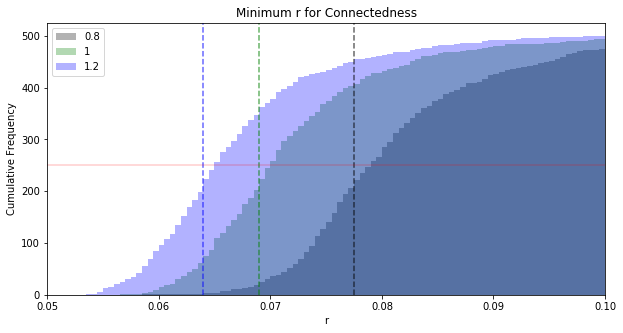

In [432]:
plt.figure(figsize=(10, 5))
for pval, col in zip([0.8, 1, 1.2], ['k', 'g', 'b']):
    plt.hist(data_dict_r[pval], bins=np.arange(0.05, 0.14, 0.0005), label=pval, alpha=.3, color=col, cumulative=1);
    hist_out = np.histogram(data_dict_r[pval], bins=50)
    ys = hist_out[0]
    xs = (hist_out[1][1:]+hist_out[1][:-1])/2
    pt = thresh_calc(xs, ys, sig_fract=.8, n_av=5)[0]

    plt.axvline(x=pt, ls='--', alpha=0.6, c=col)
    
plt.axhline(y=250, alpha=0.2, c='r')
    
#     popt, pcov = curve_fit(skewed, xs, ys)
#     plt.plot(xs, skewed(xs, *popt))

plt.legend()
plt.gca().set(title='Minimum r for Connectedness', xlabel='r', ylabel='Cumulative Frequency', xlim=(0.05, .1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


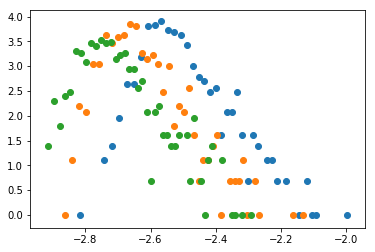

In [356]:
for pval in [0.8, 1, 1.2]:
    hist_out = np.histogram(data_dict_r[pval], bins=50);
    ys = hist_out[0]
    xs = (hist_out[1][1:]+hist_out[1][:-1])/2
#     popt, pcov = curve_fit(skewed, xs, ys)
    plt.scatter(np.log(xs), np.log(ys))


In [347]:
ys = hist_out[0]
xs = (hist_out[1][1:]+hist_out[1][:-1])/2
popt, pcov = curve_fit(skewed, xs, ys)
plt.plot(xs, skewed(xs, *popt))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

array([111.49693226,   6.57576472,   2.43335096,  50.86714327])

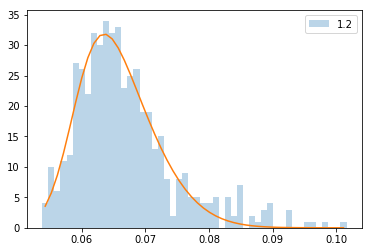

In [344]:
def skewed(x, a, b, c, d):
#     (100*(xs-.06), 4, 50)
    return d*sp.stats.skewnorm.pdf(a*x-b, c)
    
popt, pcov = curve_fit(skewed, xs, ys)

hist_out = plt.hist(data_dict_r[pval], bins=50, label=pval, alpha=.3)
plt.plot(xs, skewed(xs, *popt))
# plt.plot(xs, skewed(xs, 100, 6, 4, 50))
# plt.plot(xs, ys, label='Fit')
plt.legend()
popt

In [191]:
mean, var, skew, kurt = sp.stats.skewnorm.stats(4, moments='mvsk')
mean, var, skew, kurt

(array(0.77406172), array(0.40082845), array(0.78442676), array(0.63278475))

In [326]:
xs = np.arange(0.0, .1, 0.001)
ys = sp.stats.skewnorm.pdf(100*(xs-.07), 4)

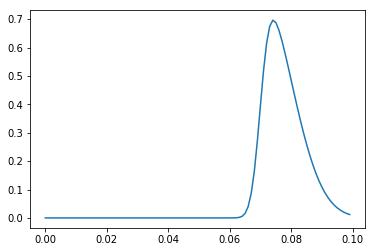

In [327]:
plt.plot(xs, ys)

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

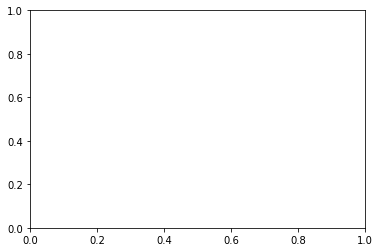

In [249]:
plt.plot(np.arange(100), skewed(np.arange(100), 1, 1))

In [257]:
skewed(np.arange(100), 1).shape

(50,)

In [259]:
np.arange(100).shape

(100,)

In [277]:
0.05*70, 0.08*70

(3.5, 5.6000000000000005)

In [363]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

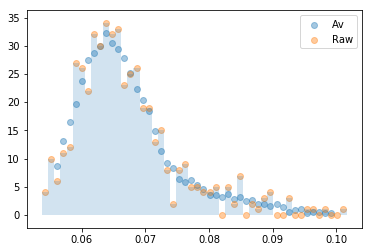

In [367]:
hist_out = plt.hist(data_dict_r[pval], bins=50, alpha=.2);
ys = hist_out[0]
xs = (hist_out[1][1:]+hist_out[1][:-1])/2
plt.scatter(moving_average(xs, n=5), moving_average(ys, n=5), alpha=.4, label='Av')
plt.scatter(xs, ys, alpha=.4, label='Raw')
plt.legend()

In [368]:
np.sum(ys), np.sum(moving_average(ys, n=5))

(500.0, 485.2)

In [413]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def thresh_calc(xs, ys, sig_fract=.8, n_av=5):

    smoothxs = (moving_average(xs, n=n_av))
    smoothys = (moving_average(ys, n=n_av))
    inds = np.where(smoothys > max(smooth)*sig_fract)
    vals, err = np.polyfit(smoothxs[inds], smoothys[inds], 2, cov=True)
    
    stat_point = -.5*vals[1]/vals[0]
    fract_err = np.sqrt(err[0, 0]/(vals[0]**2) + err[1, 1]/(vals[1]**2))

    return stat_point, fract_err*stat_point

In [397]:
vals, err = np.polyfit(smoothxs[inds], smoothys[inds], 2, cov=True)

In [412]:
np.sqrt(err[0, 0]/(vals[0]**2) + err[1, 1]/(vals[1]**2))

0.2741557868631029

In [409]:
vals

array([-442079.16530772,   56540.31017826,   -1776.77098222])

In [410]:
err

array([[ 7.35751484e+09, -9.39259942e+08,  2.99495224e+07],
       [-9.39259942e+08,  1.19926082e+08, -3.82464435e+06],
       [ 2.99495224e+07, -3.82464435e+06,  1.21995030e+05]])

In [426]:
np.arange(0.05, 0.14, 0.004)

array([0.05 , 0.054, 0.058, 0.062, 0.066, 0.07 , 0.074, 0.078, 0.082,
       0.086, 0.09 , 0.094, 0.098, 0.102, 0.106, 0.11 , 0.114, 0.118,
       0.122, 0.126, 0.13 , 0.134, 0.138])

In [ ]:
# greedypaths